In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

#                                                  Reggression Project (2)
 
 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Arrangements of the Data Sets
5.  Filling of the Row Data 
6.  Data Exploration 
7.  Splitting the Data
8.  Training the Model
9.  Predicting the Model
10. Evaluating the Model
11. Conclusions

**1. Introduction**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**2. The Aim of Analysis**

This study aims to search for the elements which effects life expectancy by using correlations with regression models.

**3. General Information of the Data**

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

**4. Data Exploration**

In [2]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [3]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [5]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [7]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)

In [8]:
def bos_hucre(LifeExpectancyData):
    bos_hucre_toplam = LifeExpectancyData.isnull().sum()
    bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
    bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)
    return bos_degerler[bos_degerler['bos_toplam'] > 0]

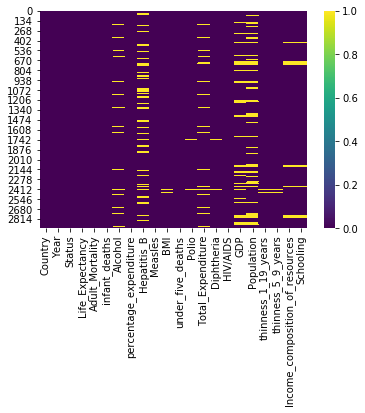

In [9]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

**4.a. Importing an Extarnel Data Frame**

***Further steps requires extra tools to compare and to group row data for cleaning and filling Null values. Therefore, I imported another data frame with neccessary columns.**

In [10]:
regions = pd.read_csv('./data/all.csv')

In [11]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,nan


In [12]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [13]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

**4.b. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

In [14]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')

In [15]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Population,556,0.197
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012


**5. Cleaning of the Row Data**

There is a high number of Null values on Population column. We already have GDP values on each countries so I prefered to drop it.

In [16]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

In [17]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [18]:
fill_list = (bos_hucre(LifeExpectancyData_merged)).index

In [19]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Polio,19,0.007


**5. Filling of the Row Data**

In [20]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [21]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
GDP,309,0.109
Hepatitis_B,144,0.051
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Alcohol,17,0.006
Total_Expenditure,16,0.006
Life_Expectancy,10,0.004


****Applying Interpolate on both direction with grouping by Country, does not help on missing values of Total_Expenditure and Alcohol  as there is no information on related countries. Thus, I used interpolte method with grouping by sub-region and Year columns.***

In [22]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [23]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
Total_Expenditure,156,0.055
Alcohol,133,0.047


****We still have Null values on Alcohol and Total_Expenditure columns. I filled missing values by means of Countries.***

In [24]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.fillna(np.round(x.mean())))

In [25]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde


**8.Training the Model**

In [26]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

In [27]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['Schooling', 'Income_composition_of_resources', 'Adult_Mortality',
       'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years', 'Polio',
       'thinness_5_9_years', 'GDP', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'under_five_deaths', 'Total_Expenditure',
       'infant_deaths', 'Year', 'Measles'],
      dtype='object')

In [28]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [30]:
X_train = sm.add_constant(X_train)

tum_degiskenli_model = sm.OLS(y_train, X_train).fit()

tum_degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     626.1
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:36:27   Log-Likelihood:                -6238.8
No. Observations:                2260   AIC:                         1.252e+04
Df Residuals:                    2241   BIC:                         1.262e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             145.4647     37.885      3.840      0.000      71.172     219.758
Schooling                           0.7583      0.046     16.528      0.000       0.668       0.848
Income_composition_of_resources     7.3585      0.687     10.716      0.000       6.012       8.705
Adult_Mortality                    -0.0171      0.001    -18.641      0.000      -0.019      -0.015
HIV/AIDS                           -0.5340      0.023    -22.784      0.000      -0.580      -0.488
BMI                                 0.0410      0.005      7.487      0.000       0.030       0.052
Diphtheria                          0.0312      0.005      5.995      0.000       0.021       0.041
thinness_1_19_years                -0.0667      0.052     -1.270      0.204      -0.170       0.036
Polio                               0.0268      0.005      5.363      0.000       0.017       0.037
thinness_5_9_years                 -0.0028      0.052     -0.055      0.956      -0.104       0.098
GDP                              2.543e-05   1.12e-05      2.268      0.023    3.44e-06    4.74e-05
Alcohol                             0.0398      0.026      1.501      0.134      -0.012       0.092
percentage_expenditure              0.0002   7.58e-05      2.967      0.003    7.62e-05       0.000
Hepatitis_B                        -0.0044      0.004     -1.109      0.268      -0.012       0.003
under_five_deaths                  -0.0672      0.006    -10.499      0.000      -0.080      -0.055
Total_Expenditure                   0.0371      0.035      1.057      0.290      -0.032       0.106
infant_deaths                       0.0901      0.009     10.404      0.000       0.073       0.107
Year                               -0.0461      0.019     -2.434      0.015      -0.083      -0.009
Measles                         -1.388e-05   9.18e-06     -1.513      0.130   -3.19e-05    4.11e-06
==============================================================================
Omnibus:                      124.186   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.456
Skew:                          -0.040   Prob(JB):                    1.04e-105
Kurtosis:                       5.264   Cond. No.                     7.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

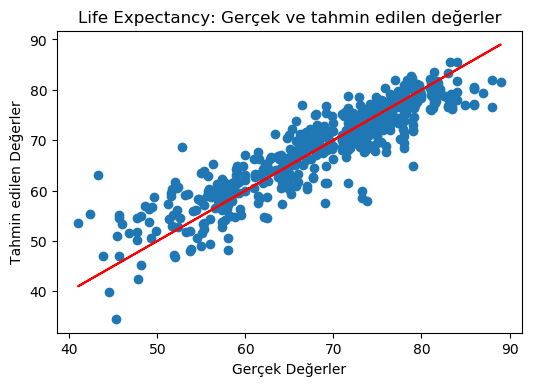

In [31]:
X_test = sm.add_constant(X_test)

y_preds = tum_degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Life Expectancy: Gerçek ve tahmin edilen değerler")
plt.show()

In [32]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 3.1368814854561715
Ortalama Kare Hata (MSE)          : 17.422056097737922
Kök Ortalama Kare Hata (RMSE)     : 4.17397365800719
Ortalama Mutlak Yüzde Hata (MAPE) : 4.827061352168725


In [33]:
len(tum_degiskenli_model.pvalues)

19

In [34]:
pDegeri = tum_degiskenli_model.pvalues
anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
anlamli_degerler

['const',
 'Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

In [35]:
anlamli_degerler= anlamli_degerler[1:]

In [36]:
len(anlamli_degerler)

12

In [37]:
y_anlamli = LifeExpectancyData_num['Life_Expectancy'] 
X_anlamli = LifeExpectancyData_num[anlamli_degerler] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [39]:
X_anlamli = sm.add_constant(X_anlamli)
anlamli_12degiskenli_model = sm.OLS(y_anlamli, X_anlamli).fit()
anlamli_12degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1128.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:36:28   Log-Likelihood:                -7864.4
No. Observations:                2826   AIC:                         1.575e+04
Df Residuals:                    2813   BIC:                         1.583e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             151.6324     33.500      4.526      0.000      85.945     217.320
Schooling                           0.7940      0.040     20.056      0.000       0.716       0.872
Income_composition_of_resources     7.8277      0.635     12.334      0.000       6.583       9.072
Adult_Mortality                    -0.0173      0.001    -20.940      0.000      -0.019      -0.016
HIV/AIDS                           -0.5335      0.021    -25.588      0.000      -0.574      -0.493
BMI                                 0.0443      0.005      9.725      0.000       0.035       0.053
Diphtheria                          0.0299      0.004      6.649      0.000       0.021       0.039
Polio                               0.0239      0.004      5.403      0.000       0.015       0.033
GDP                              2.806e-05   1.05e-05      2.683      0.007    7.55e-06    4.86e-05
percentage_expenditure              0.0002      7e-05      3.487      0.000       0.000       0.000
under_five_deaths                  -0.0643      0.006    -10.990      0.000      -0.076      -0.053
infant_deaths                       0.0848      0.008     10.704      0.000       0.069       0.100
Year                               -0.0496      0.017     -2.963      0.003      -0.082      -0.017
==============================================================================
Omnibus:                      159.442   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.423
Skew:                           0.047   Prob(JB):                    5.21e-140
Kurtosis:                       5.332   Cond. No.                     7.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

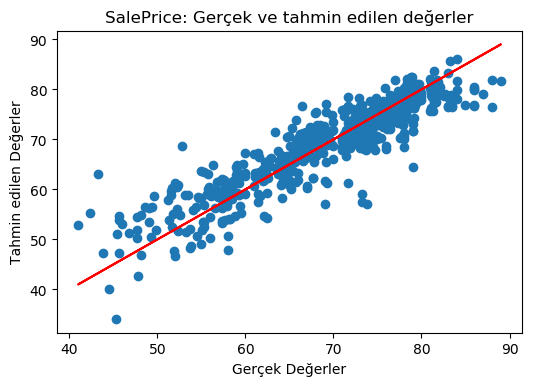

In [40]:
X_test = sm.add_constant(X_test)

y_preds = anlamli_12degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("SalePrice: Gerçek ve tahmin edilen değerler")
plt.show()

In [41]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared) 


0.834128773882979
0.827936654182605


In [42]:
anlamli_12degiskenli_model.pvalues

const                             0.000
Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        0.000
Polio                             0.000
GDP                               0.007
percentage_expenditure            0.000
under_five_deaths                 0.000
infant_deaths                     0.000
Year                              0.003
dtype: float64

In [43]:
anlamli_degerler

['Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

anlamli_degerler listesinde artik sabit olmadigi icin devam edebiliriz.

In [45]:
X_arttirilmis_anlamli = LifeExpectancyData_num[anlamli_degerler[:10]]


In [46]:
len(anlamli_degerler[:10])

10

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_arttirilmis_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [48]:
X_artilirmis_anlamli = sm.add_constant(X_arttirilmis_anlamli)

anlamli_10degiskenli_model = sm.OLS(y_anlamli, X_arttirilmis_anlamli).fit()

anlamli_10degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.552e+04
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:37:06   Log-Likelihood:                -10327.
No. Observations:                2826   AIC:                         2.067e+04
Df Residuals:                    2816   BIC:                         2.073e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Schooling                           2.2807      0.089     25.579      0.000       2.106       2.456
Income_composition_of_resources    15.3804      1.493     10.305      0.000      12.454      18.307
Adult_Mortality                     0.0346      0.002     21.255      0.000       0.031       0.038
HIV/AIDS                           -0.6814      0.049    -13.843      0.000      -0.778      -0.585
BMI                                 0.0913      0.011      8.435      0.000       0.070       0.112
Diphtheria                          0.1347      0.010     12.895      0.000       0.114       0.155
Polio                               0.1392      0.010     13.529      0.000       0.119       0.159
GDP                             -4.898e-05   2.48e-05     -1.973      0.049   -9.77e-05   -2.93e-07
percentage_expenditure           8.408e-05      0.000      0.506      0.613      -0.000       0.000
under_five_deaths                   0.0113      0.001     10.289      0.000       0.009       0.013
==============================================================================
Omnibus:                      331.455   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.254
Skew:                           0.776   Prob(JB):                    1.50e-129
Kurtosis:                       4.621   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Ortalama Mutlak Hata (MAE)        : 3.126973852322395
Ortalama Kare Hata (MSE)          : 17.460090130435983
Kök Ortalama Kare Hata (RMSE)     : 4.178527268121626
Ortalama Mutlak Yüzde Hata (MAPE) : 4.8044693525479385


In [50]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared)
print (anlamli_10degiskenli_model.rsquared)


0.834128773882979
0.827936654182605
0.9821827194575035


In [51]:
anlamli_10degiskenli_model.pvalues

Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        0.000
Polio                             0.000
GDP                               0.049
percentage_expenditure            0.613
under_five_deaths                 0.000
dtype: float64

In [52]:
X_daha_arttirilmis_anlamli = LifeExpectancyData_num[anlamli_degerler[:5]]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_daha_arttirilmis_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [54]:
X_daha_arttirilmis_anlamli = sm.add_constant(X_daha_arttirilmis_anlamli)

anlamli_5degiskenli_model = sm.OLS(y_anlamli, X_daha_arttirilmis_anlamli).fit()

anlamli_5degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2232.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:37:07   Log-Likelihood:                -8088.9
No. Observations:                2826   AIC:                         1.619e+04
Df Residuals:                    2820   BIC:                         1.623e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.6794      0.412    130.431      0.000      52.872      54.486
Schooling                           0.9497      0.042     22.787      0.000       0.868       1.031
Income_composition_of_resources     9.9564      0.666     14.958      0.000       8.651      11.262
Adult_Mortality                    -0.0189      0.001    -21.399      0.000      -0.021      -0.017
HIV/AIDS                           -0.5552      0.022    -24.952      0.000      -0.599      -0.512
BMI                                 0.0504      0.005     10.388      0.000       0.041       0.060
==============================================================================
Omnibus:                      230.041   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1283.588
Skew:                           0.125   Prob(JB):                    1.87e-279
Kurtosis:                       6.292   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

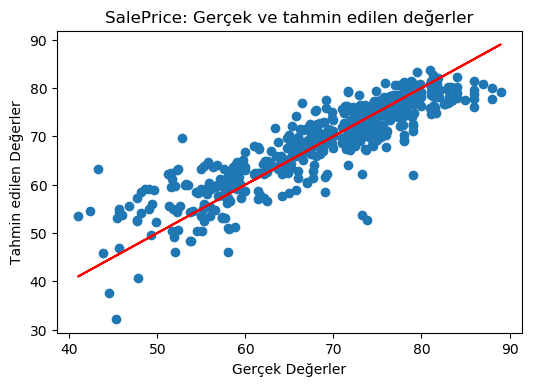

In [55]:
X_test = sm.add_constant(X_test)

y_preds = anlamli_5degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("SalePrice: Gerçek ve tahmin edilen değerler")
plt.show()

In [56]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared)
print (anlamli_10degiskenli_model.rsquared)
print (anlamli_5degiskenli_model.rsquared)

0.834128773882979
0.827936654182605
0.9821827194575035
0.7983029265963225
